In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [83]:
data = pd.read_csv('layoffs.csv')
data.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,ResearchGate,Berlin,Other,25.0,0.10,2022-11-28,Series D,Germany,87.0
1,VerSe Innovation,Bengaluru,Media,150.0,0.05,2022-11-25,Series J,India,1700.0
2,Lemon,Buenos Aires,Crypto,100.0,0.38,2022-11-24,Series A,Argentina,17.0
3,Quidax,Lagos,Crypto,20.0,0.20,2022-11-24,Unknown,Nigeria,3.0
4,Menulog,Sydney,Food,NaN,NaN,2022-11-24,Acquired,Australia,NaN


In [8]:
# eliminating null values

data['industry'] = data['industry'].fillna(data['industry'].mode()[0])
data['stage'] = data['stage'].fillna(data['stage'].mode()[0])
data['total_laid_off'] = data['total_laid_off'].fillna(data['total_laid_off'].mean())
data['percentage_laid_off'] = data['percentage_laid_off'].fillna(data['percentage_laid_off'].mode()[0])
data['funds_raised'] = data['funds_raised'].fillna(data['funds_raised'].mean())

<AxesSubplot:>

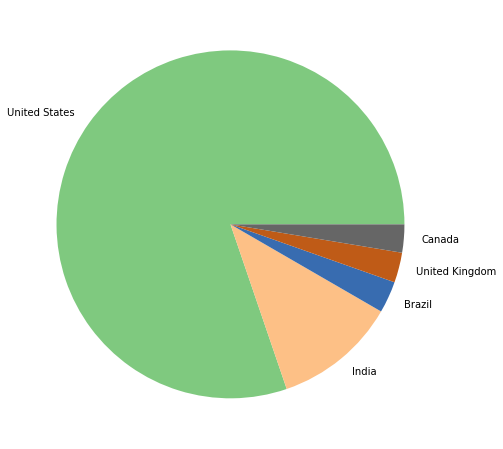

In [36]:
# top countries with highest laid offs

data.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="", 
                                                                                                 figsize=(8,8), 
                                                                                                 kind='pie', 
                                                                                                 stacked=True, 
                                                                                                 colormap='Accent')

<AxesSubplot:>

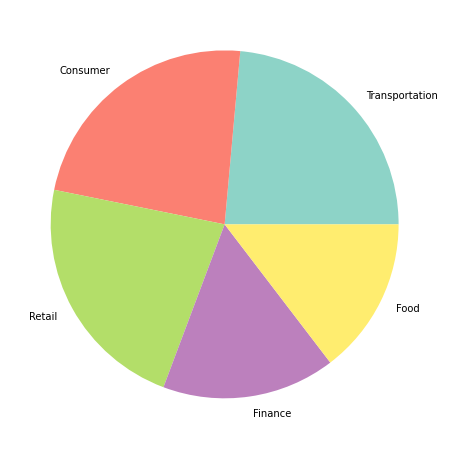

In [62]:
# top 5 industries affected by lay off worldwide

data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8),
                                                                                        kind='pie', 
                                                                                        stacked=True, colormap='Set3')

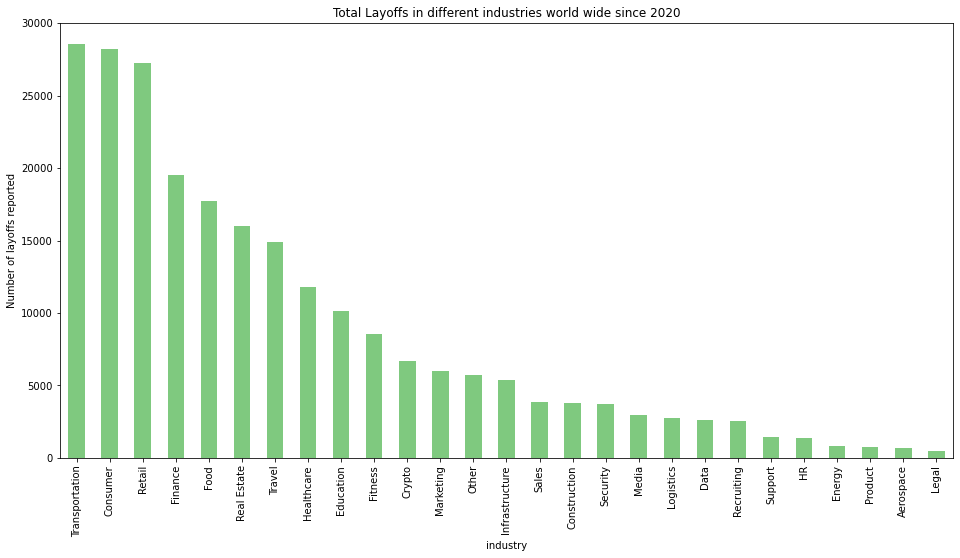

In [46]:
plt.figure(figsize=(10, 6))
plt.title("Total Layoffs in different industries world wide since 2020")
plt.ylabel("Number of layoffs reported")
df_industries = data.groupby('industry').sum()['total_laid_off'].sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True, colormap='Accent')

<AxesSubplot:>

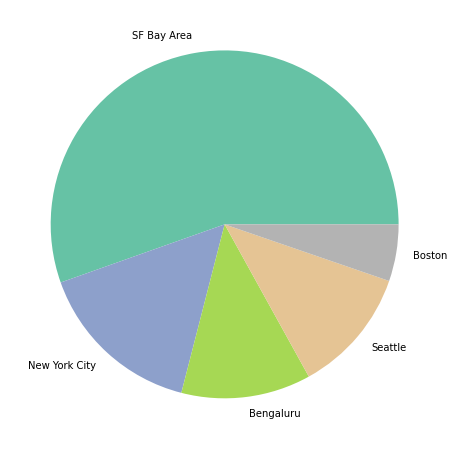

In [63]:
# top 5 locations affected by lay off worldwide

data.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), 
                                                                                        kind='pie', 
                                                                                        stacked=True, colormap='Set2')

In [47]:
# getting the years

df = data.set_index('date')
df_2022 = data.loc[:'2022']
df_2021 = data.loc[(df.index > '2021-01-01')&(df.index < '2022-01-01')]
df_2020 = data.loc[(df.index > '2020-01-01')&(df.index < '2021-01-01')]

In [64]:
# top 5 companies with highest laid offs in 2022

df_2022_most_layoffs = df_2022.sort_values(by='total_laid_off', ascending=False)
df_2022_most_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
93,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09,IPO,United States,26000.0
32,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,IPO,United States,108.0
33,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,2022-11-16,IPO,United States,2.0
122,Twitter,SF Bay Area,Consumer,3700.0,0.50,2022-11-04,IPO,United States,12900.0
15,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,IPO,United States,1600.0


<AxesSubplot:xlabel='company,country'>

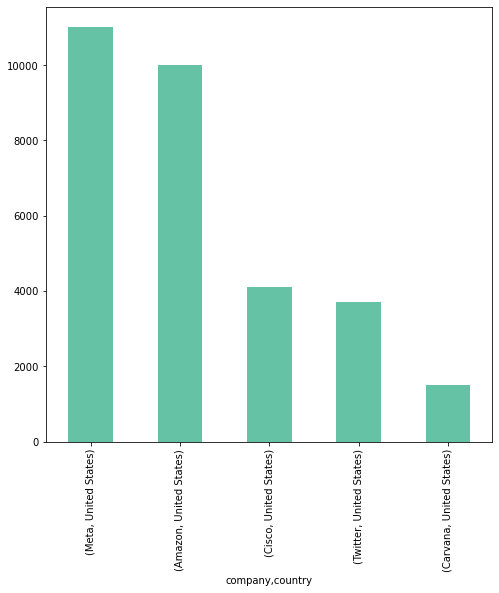

In [67]:
# visualizing the top 5 companies that alif off staff in 2022

df_2022.groupby(['company', 'country'])['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), 
                                                                                        kind='bar', 
                                                                                        stacked=True, colormap='Set2')

In [68]:
# the top 5 companies that laid off staff in 2021

df_2021_most_layoffs = df_2021.sort_values(by='total_laid_off', ascending=False)
df_2021_most_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1013,Katerra,SF Bay Area,Construction,2434.0,1.00,2021-06-01,Unknown,United States,1600.0
1001,Zillow,Seattle,Real Estate,2000.0,0.25,2021-11-02,IPO,United States,97.0
1034,Instacart,SF Bay Area,Food,1877.0,NaN,2021-01-21,Unknown,United States,2400.0
1039,WhiteHat Jr,Mumbai,Education,1800.0,NaN,2021-01-06,Acquired,India,11.0
1011,Bytedance,Shanghai,Consumer,1800.0,NaN,2021-08-05,Unknown,China,9400.0


<AxesSubplot:xlabel='company,country'>

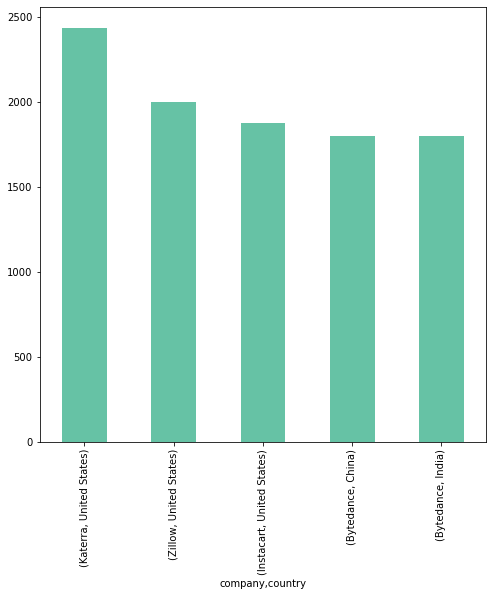

In [69]:
# visualizing the top 5 companies that alif off staff in 2021

df_2021.groupby(['company', 'country'])['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), 
                                                                                        kind='bar', 
                                                                                        stacked=True, colormap='Set2')

<AxesSubplot:title={'center':'2022 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

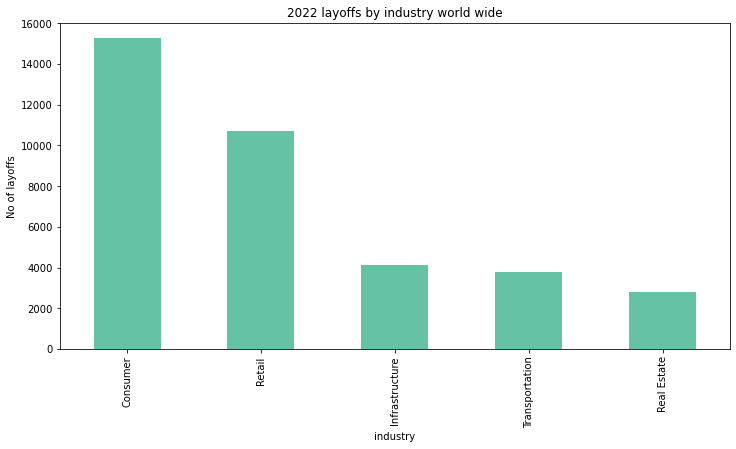

In [70]:
# visualizing the top 5 industries with highest laid off in 2022

df_2022.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2022 layoffs by industry world wide" ,
                                                                                             ylabel="No of layoffs", figsize=(12,6), 
                                                                                             kind='bar', stacked=True, colormap='Set2')

<AxesSubplot:title={'center':'2021 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

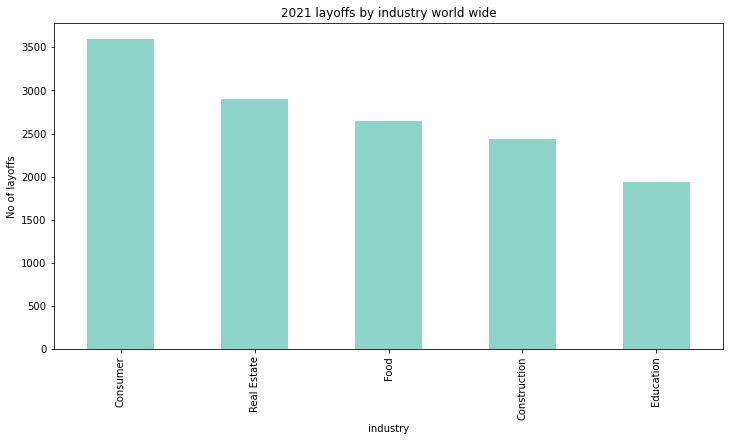

In [72]:
df_2021.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2021 layoffs by industry world wide" ,
                                                                                             ylabel="No of layoffs", figsize=(12,6), 
                                                                                             kind='bar', stacked=True, 
                                                                                             colormap='Set3')

In [73]:
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df_industry = df.groupby([ df.industry, df.date.dt.year]).sum()
# df_industry.sort_values(by=['total_laid_off','date'], ascending=False)

In [74]:
df_industry = df_industry.reset_index()

<AxesSubplot:title={'center':'Yearly layoffs in various industries world wide'}, xlabel='industry', ylabel='total_laid_off'>

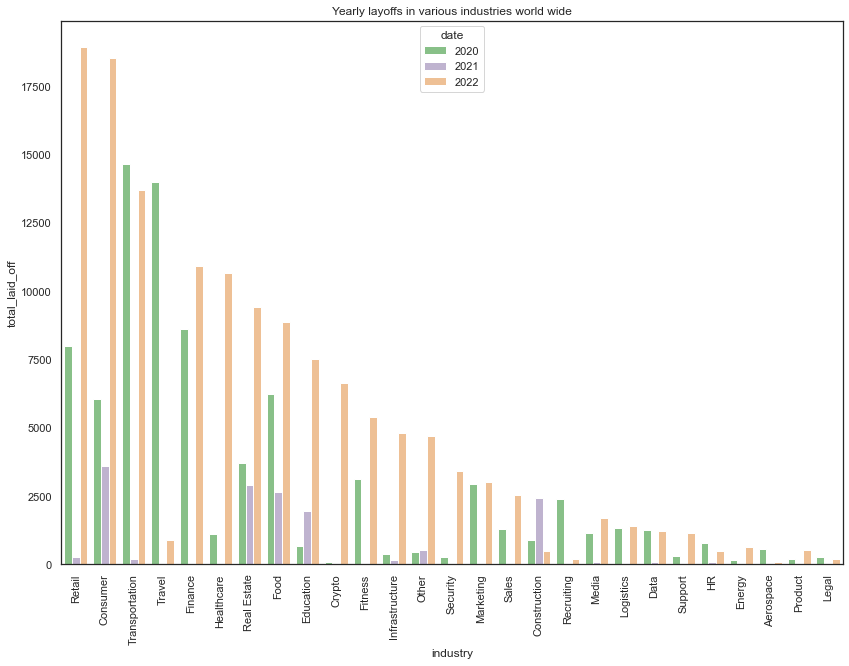

In [79]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title("Yearly layoffs in various industries world wide")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_industry.sort_values(by=['total_laid_off','date'], ascending=False), x="industry",
            y="total_laid_off", hue="date")

In [81]:
df_nigeria = df[df['country']=='Nigeria']
df_nigeria_industry_yearly = df_nigeria.groupby([ df_nigeria.industry, df_nigeria.date.dt.year]).sum()
df_nigeria_industry_yearly = df_nigeria_industry_yearly.reset_index()

<AxesSubplot:title={'center':'Nigeria - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

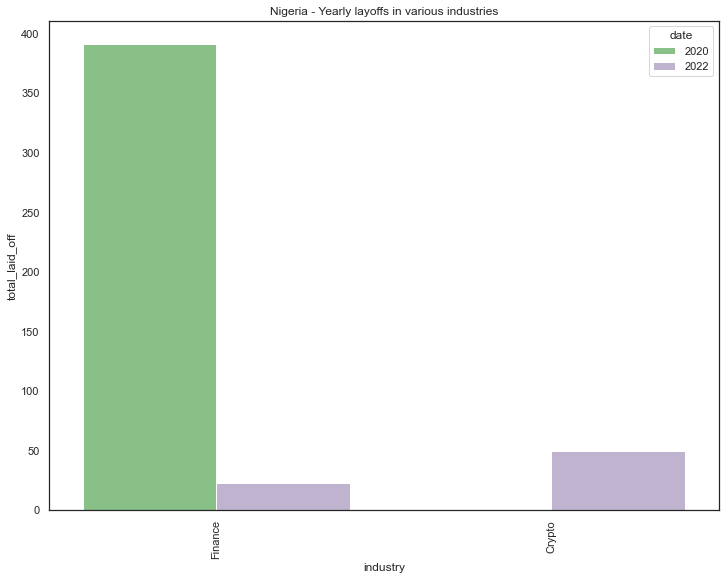

In [82]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
plt.title("Nigeria - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)
sns.barplot(data=df_nigeria_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

In [ ]:
# the United States suffered most lay offs in the world
# The transportation industry faced the most lay offs 
